Moving from the standard CNN, RNN to something more interesting like
1. Build graph like models
2. share a layer across different inputs 
3. Use Keras Model like python function
4. Keras callbacks
5. Tensor board browser visualization 
6. best practices including batch normalization, residual connections, hyperparameter optimization and model ensembling

Going Beyond the Sequential Model the Keras API
----
So far we have only used Sequential Model which makes an assumption of one input and one output and it consists of a linear stack. Some network require several indepedent inputs , other require multiple outputs and some network have internal branching between layers that makes them look like graph of layers rather than linear stack
Some tasks for instance require multi modal inputs they merge data coming from different input sources, processing each type of data using different type of neural network.
Imagine a deep learning model trying to predict the most likely price of a second hand piece of clothing, using the following inputs
A. user provided metadata (such as brand , age etc..)
B. A user provided text description
C. Picture of the Item

If you only had meta data you could use one hot encode on the data and use a densely connected network to predict the price.
If there was only  text we could use RNN or 1D CNN 
If you only had picture we could use 2D CNN

Using 3 all the same time is required here. 
A naive approach would be to train each model seperately and then do a weighted average of the prediction.
This may be suboptimal because the information extracted by a model may be redudant
A better way is jointly learn a more accurate model on the data by using a model that can use all these input modalities simultaneously , a model with 3 input branches.
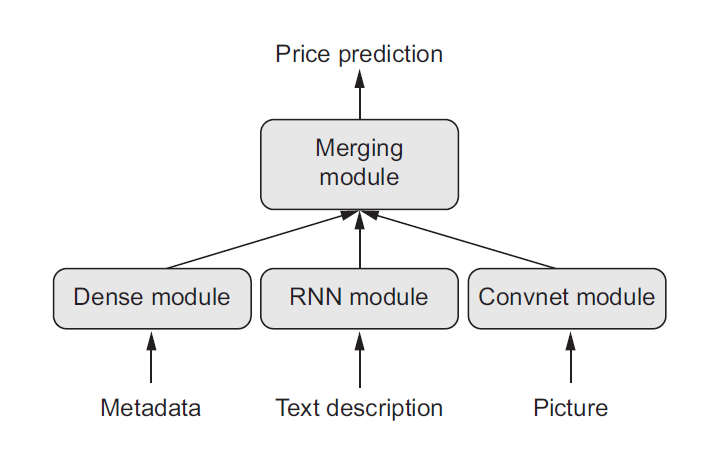

Similarly some tasks needs to predict multiple target attributes of input data. 
Given a text of a novel or short story , there may be a need to automatically classify the genre and predict the approximate date it was written. We could use 2 seperate model one for the data and one for the genre but these attributes are statistically dependent it would be better to build one model to jointly predict date and genre.

Due to the correlation between the genre and date, knowing the date of the model would help the model learn richer representation of the space of the novel genre and vice versa 


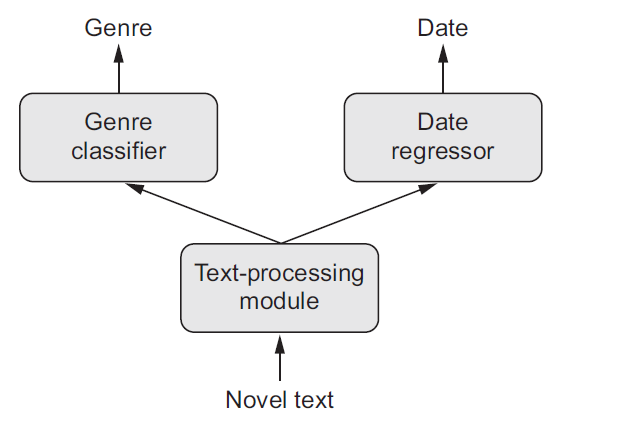

Additionally more recently developed neural architecture require non linear network topology for example Inception Family of network where the input is processed by several parallel convolutional branches whose outputs are merged into a single tensor. 
    There is also a recent trend of adding residual connections to a model. A residual connection consist of injecting previous representations into downstream flow of data by adding a past output tensor which helps prevent information loss along data processing flow. Three important use cases
    1. multi input model 
    2. multi output model
    3. graph like model

In [1]:
from keras import Input, layers

Using TensorFlow backend.


In [2]:
input_tensor = Input(shape=(32,)) # A Tensor
dense = layers.Dense(32, activation='relu') # A layer as a function

W1030 14:56:37.743447   452 deprecation_wrapper.py:119] From e:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1030 14:56:38.030745   452 deprecation_wrapper.py:119] From e:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



In [3]:
output_tensor = dense(input_tensor) # A layer may be called on a tensor and it returns a tensor

W1030 14:57:41.428222   452 deprecation_wrapper.py:119] From e:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [4]:
output_tensor

<tf.Tensor 'dense_1/Relu:0' shape=(?, 32) dtype=float32>

In [5]:
from keras.models import Sequential, Model
from keras import layers
from keras import Input

In [7]:
input_tensor = Input(shape=(32,))
x = layers.Dense(32, activation='relu')(input_tensor) # binds input_tensor to the model--- X1
x = layers.Dense(32, activation='relu')(x)
output_tensor = layers.Dense(10, activation='softmax')(x)

In [8]:
model = Model(input_tensor, output_tensor) # same input_tensor is given here --- X2
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 2,442
Trainable params: 2,442
Non-trainable params: 0
_________________________________________________________________


The place where we connect the input tensor to the model as marked as X1 is important as this binds the input_tensor to the model so when we create the model the same input_tensor needs to be given as marked in X2 if we change the input_tensor with a new one the model will throw an error.



unrelated_input = Input(shape=(32,))
bad_model = model = Model(unrelated_input, output_tensor)

RuntimeError: Graph disconnected: cannot
obtain value for tensor
➥Tensor("input_1:0", shape=(?, 64), dtype=float32) at layer "input_1".

In [9]:
model.compile(optimizer='rmsprop', loss= 'categorical_crossentropy')

W1030 15:17:27.316005   452 deprecation_wrapper.py:119] From e:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1030 15:17:27.675843   452 deprecation_wrapper.py:119] From e:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [13]:
import numpy as np
x_train = np.random.random((1000, 32))
y_train = np.random.random((1000, 10))

In [14]:
model.fit(x_train, y_train, epochs=10, batch_size=128)

W1030 15:18:30.992276   452 deprecation.py:323] From e:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1030 15:18:31.056622   452 deprecation_wrapper.py:119] From e:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
1000/1000 [==============================] - 14s 14ms/step - loss: 11.5800
Epoch 2/10
1000/1000 [==============================] - 0s 22us/step - loss: 11.5251
Epoch 3/10
1000/1000 [==============================] - 0s 23us/step - loss: 11.5119
Epoch 4/10
1000/1000 [==============================] - 0s 23us/step - loss: 11.5057
Epoch 5/10
1000/1000 [==============================] - 0s 22us/step - loss: 11.5018
Epoch 6/10
1000/1000 [==============================] - 0s 23us/step - loss: 11.4991
Epoch 7/10
1000/1000 [==============================] - 0s 24us/step - loss: 11.4972
Epoch 8/10
1000/1000 [==============================] - 0s 25us/step - loss: 11.4956
Epoch 9/10
1000/1000 [==============================] - 0s 23us/step - loss: 11.4944
Epoch 10/10
1000/1000 [==============================] - 0s 25us/step - loss: 11.4929


In [15]:
score = model.evaluate(x_train, y_train)

1000/1000 [==============================] - 0s 50us/step


Multi Input Models
---
Typically such models at some point merge their different input branches using a layer that can combine several tensors by adding them , concatenating them and so on. 
This is usually done by Kera merge operation such as keras.layers.add , keras.layers.concatenate
Looking into a very simple example of multi input models
A typical question answering machine model has 2 inputs a natural language question and a text snippet. The model should then produce an answer in the simplest possible set up a word answer obtained via softmax over some predefined vocabulary.
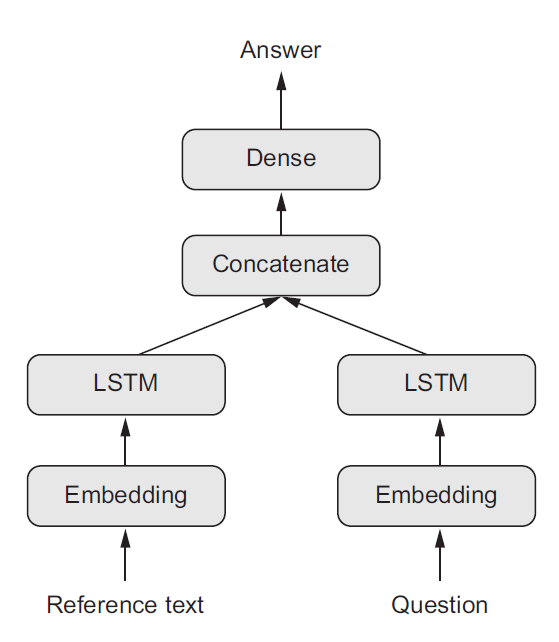

    Following the Functional API , setting up two different input branches , encoding the text input and question input as a representation vectors, then concatenate these vectors and finally add a softmax classifier

In [16]:
input_tensor = Input(shape=(64,))
x = layers.Dense(32, activation='relu')(input_tensor)
x = layers.Dense(32, activation='relu')(x)

input_tensorA = Input(shape=(64,))
xA = layers.Dense(32, activation='relu')(input_tensor)
xA = layers.Dense(32, activation='relu')(xA)

In [18]:
import keras
added = keras.layers.Add()([x, xA])


In [19]:
output_tensorA = layers.Dense(10, activation='softmax')(added)

In [22]:
model = keras.models.Model(inputs=[input_tensor, input_tensorA], outputs=output_tensorA)

In [23]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 64)           0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 32)           2080        input_4[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 32)           2080        input_4[0][0]                    
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 32)           1056        dense_7[0][0]                    
__________________________________________________________________________________________________
dense_10 (

In [30]:
import numpy as np
x_1 = np.random.random((1000, 64))
x_2 = np.random.random((1000, 64))
y_train = np.random.random((1000, 10))
model.compile(optimizer='rmsprop', loss= 'categorical_crossentropy')

In [31]:
model.fit( [x_1, x_2] , y_train, epochs=10, batch_size=128)

Epoch 1/10
1000/1000 [==============================] - 0s 256us/step - loss: 11.8631
Epoch 2/10
1000/1000 [==============================] - 0s 28us/step - loss: 11.6808
Epoch 3/10
1000/1000 [==============================] - 0s 28us/step - loss: 11.6542
Epoch 4/10
1000/1000 [==============================] - 0s 29us/step - loss: 11.6409
Epoch 5/10
1000/1000 [==============================] - 0s 28us/step - loss: 11.6309
Epoch 6/10
1000/1000 [==============================] - 0s 29us/step - loss: 11.6243
Epoch 7/10
1000/1000 [==============================] - 0s 27us/step - loss: 11.6189
Epoch 8/10
1000/1000 [==============================] - 0s 28us/step - loss: 11.6142
Epoch 9/10
1000/1000 [==============================] - 0s 29us/step - loss: 11.6102
Epoch 10/10
1000/1000 [==============================] - 0s 27us/step - loss: 11.6062
